### Steps
1. Data gethering
  
3. EDA
4. Model Training 
5. Model Testing/ accuracy score
6. Deployment

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars=pd.read_csv(r'A:\Work Docs\Data Analyst work\Campus X\00 Datasets For coding\Car price from Car dekho\car_price.csv')

In [3]:
cars.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [4]:
cars.shape

(5512, 10)

In [5]:
cars['ownership']

0       1st Owner
1       1st Owner
2       1st Owner
3       1st Owner
4       1st Owner
          ...    
5507    1st Owner
5508    2nd Owner
5509    2nd Owner
5510    3rd Owner
5511    2nd Owner
Name: ownership, Length: 5512, dtype: object

In [6]:
import matplotlib.pyplot as plt 

(array([3736.,    0., 1314.,    0.,  359.,    0.,   84.,    0.,   12.,
           7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

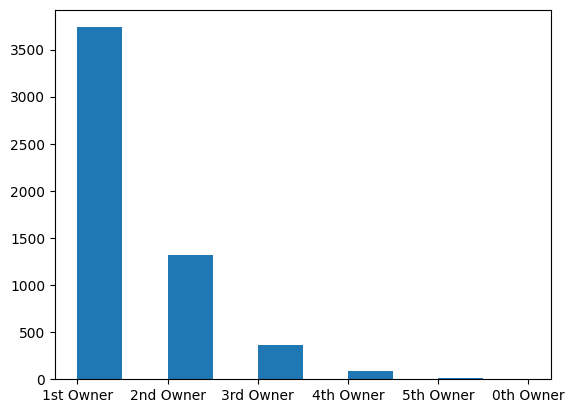

In [7]:
plt.hist(cars['ownership'])

In [8]:
def brand_name(car_name):
    pos = car_name.index(" ")
    brand_name = car_name[0:pos]
    car_model = car_name[pos+1:]
    return brand_name

def model_name(car_name):
    pos = car_name.index(" ")
    car_model = car_name[pos+1:]
    return car_model

In [9]:
cars["brand_name"] = cars['car_name'].apply(brand_name)
cars["model_name"] = cars['car_name'].apply(model_name)

In [10]:
cars.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand_name,model_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster RXZ Turbo CVT
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Camry 2.5 G
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Jazz VX CVT
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Polo 1.2 MPI Highline


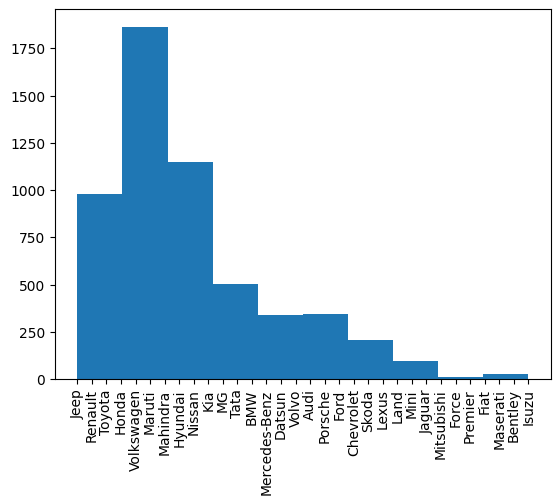

In [11]:
plt.hist(cars['brand_name'])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
brand_group=cars.groupby('brand_name')

In [13]:
brand_group.nunique()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model_name
brand_name,,,,,,,,,,,
Audi,166,51,85,73,2,2,5,13,53,3,51
BMW,172,51,97,80,2,1,4,15,54,4,51
Bentley,1,1,1,1,1,1,1,1,1,1,1
Chevrolet,82,34,61,52,3,2,4,12,41,4,34
Datsun,25,11,21,21,1,2,3,7,18,3,11
Fiat,17,15,15,16,2,1,3,7,12,3,15
Force,1,1,1,1,1,1,1,1,1,1,1
Ford,168,83,128,117,2,2,4,19,61,5,83
Honda,498,154,262,325,2,2,5,19,75,5,154


In [14]:
"Lakh" not in  cars['car_prices_in_rupee']

True

In [15]:
# Formate of car price
#   1.15 Crore
#   90,000
#   70 Lakh



In [16]:
def convert_in_lakh(price):
    if 'Lakh' in price:
        pos = price.index("Lakh")
        inr = float(price[0:pos].strip())
        return round(inr,2)

    elif "Crore" in price:
        pos = price.index("Crore")
        inr = float(price[0:pos].strip())*100
        return round(inr,2)

    elif "," in price:
        pos = price.index(",")
        inr = price[0:pos] + price[pos+1:]
        inr = float(inr)/100000
            
        return round(inr,2)


    else:
        return price


    

    


In [17]:
convert_in_lakh("12,000")

0.12

In [18]:
cars['car_prices_in_rupee'] = cars['car_prices_in_rupee'].apply(convert_in_lakh)

In [19]:
cars.head(2)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand_name,model_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV
1,1,Renault Duster RXZ Turbo CVT,12.83,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Duster RXZ Turbo CVT


(array([2423.,    0., 2967.,    0.,    0.,   80.,    0.,   14.,    0.,
          28.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

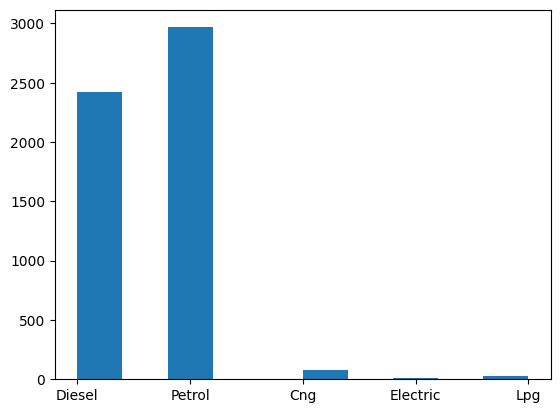

In [20]:
plt.hist(cars['fuel_type'])

In [21]:
cars[cars['fuel_type']=='Cng']

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand_name,model_name
254,254,Hyundai Grand i10 Nios Sportz CNG,7.50,"5,000 kms",Cng,Manual,1st Owner,2022,1197 cc,5 Seats,Hyundai,Grand i10 Nios Sportz CNG
563,563,Maruti Wagon R LXI CNG Optional,3.90,"67,200 kms",Cng,Manual,1st Owner,2014,1248 cc,5 Seats,Maruti,Wagon R LXI CNG Optional
567,567,Maruti Wagon R CNG LXI,4.90,"59,000 kms",Cng,Manual,1st Owner,2019,1968 cc,5 Seats,Maruti,Wagon R CNG LXI
594,594,Maruti Wagon R LXI CNG,4.65,"72,000 kms",Cng,Manual,1st Owner,2017,1582 cc,5 Seats,Maruti,Wagon R LXI CNG
616,616,Maruti Wagon R LXI CNG,3.40,"75,270 kms",Cng,Manual,1st Owner,2016,1197 cc,5 Seats,Maruti,Wagon R LXI CNG
...,...,...,...,...,...,...,...,...,...,...,...,...
4983,4983,Maruti Celerio VXI CNG,4.32,"74,776 kms",Cng,Manual,1st Owner,2020,1197 cc,5 Seats,Maruti,Celerio VXI CNG
5004,5004,Maruti Wagon R LXI CNG,1.92,"70,048 kms",Cng,Manual,3rd Owner,2012,1197 cc,5 Seats,Maruti,Wagon R LXI CNG
5150,5150,Maruti Ertiga VXI CNG,7.05,"77,778 kms",Cng,Manual,1st Owner,2018,1462 cc,5 Seats,Maruti,Ertiga VXI CNG
5165,5165,Maruti Alto Green LXi (CNG),1.34,"1,27,866 kms",Cng,Manual,1st Owner,2010,1498 cc,5 Seats,Maruti,Alto Green LXi (CNG)


(array([4673.,    0.,   61.,    0.,  631.,    0.,   88.,    0.,   54.,
           5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

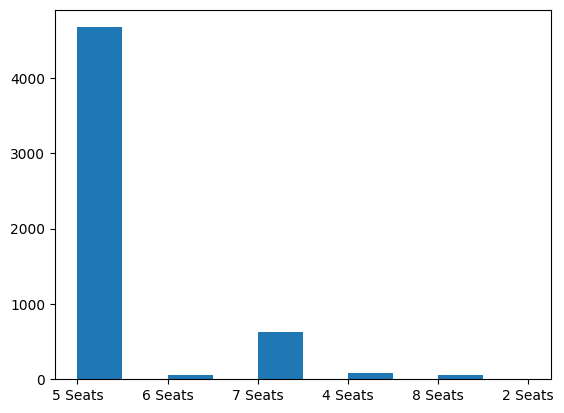

In [22]:
plt.hist(cars['Seats'])

In [23]:
cars['kms_driven']

0       86,226 kms
1       13,248 kms
2       60,343 kms
3       26,696 kms
4       69,414 kms
           ...    
5507    45,000 kms
5508    29,000 kms
5509    90,000 kms
5510    79,000 kms
5511    42,000 kms
Name: kms_driven, Length: 5512, dtype: object

In [24]:
cars['kms_driven']=cars['kms_driven'].str.replace(' kms',"")
cars['kms_driven']=cars['kms_driven'].str.replace(',',"").astype(float)

In [25]:
cars['kms_driven']

0       86226.0
1       13248.0
2       60343.0
3       26696.0
4       69414.0
         ...   
5507    45000.0
5508    29000.0
5509    90000.0
5510    79000.0
5511    42000.0
Name: kms_driven, Length: 5512, dtype: float64

In [26]:
cars['kms_driven'].describe()

count      5512.000000
mean      63211.888062
std       41844.131167
min         250.000000
25%       33151.750000
50%       59000.000000
75%       84265.250000
max      560000.000000
Name: kms_driven, dtype: float64

<Axes: xlabel='kms_driven', ylabel='Count'>

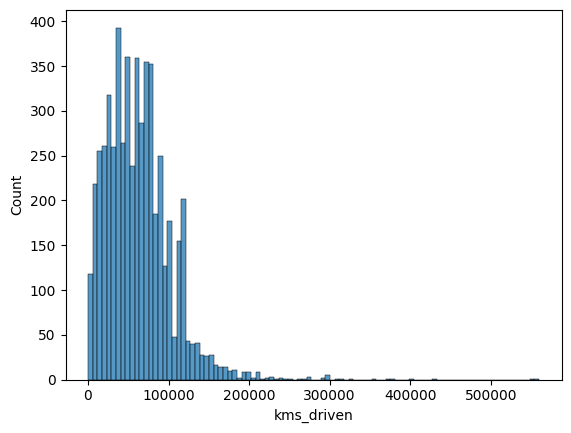

In [27]:
import seaborn as sns
sns.histplot(data=cars['kms_driven'])


<Axes: xlabel='car_prices_in_rupee', ylabel='Count'>

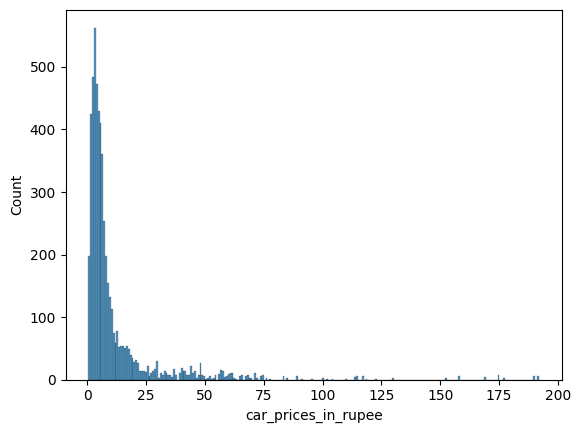

In [28]:
sns.histplot(data=cars['car_prices_in_rupee'])

<Axes: xlabel='manufacture', ylabel='Count'>

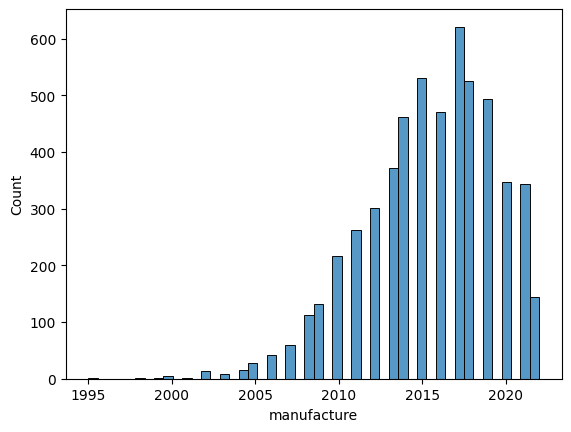

In [29]:
sns.histplot(data= cars['manufacture'])

In [30]:
cars.head(1)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,brand_name,model_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV


In [31]:
cars.rename(columns={"engine":'engine_in_cc'},inplace=True)

In [32]:
cars.head(1)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_in_cc,Seats,brand_name,model_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV


In [33]:
cars['engine_in_cc'] = cars['engine_in_cc'].str.replace(" cc", "").astype(float)


In [34]:
cars['engine_in_cc']

0       1956.0
1       1330.0
2       2494.0
3       1199.0
4       1199.0
         ...  
5507    2995.0
5508    1968.0
5509    2755.0
5510    2967.0
5511    1991.0
Name: engine_in_cc, Length: 5512, dtype: float64

<Axes: xlabel='car_prices_in_rupee', ylabel='kms_driven'>

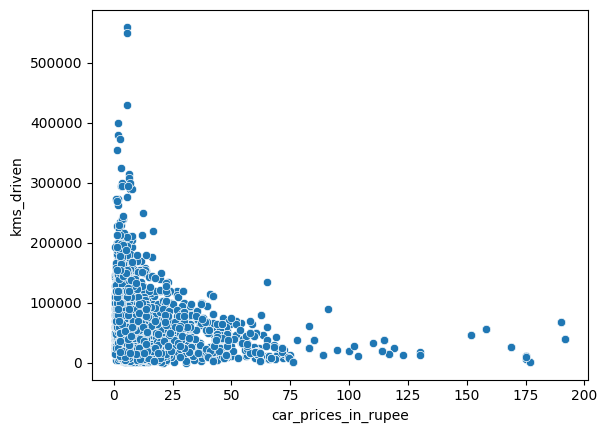

In [35]:
sns.scatterplot(x=cars['car_prices_in_rupee'],y=cars['kms_driven'])

<Axes: xlabel='car_prices_in_rupee', ylabel='engine_in_cc'>

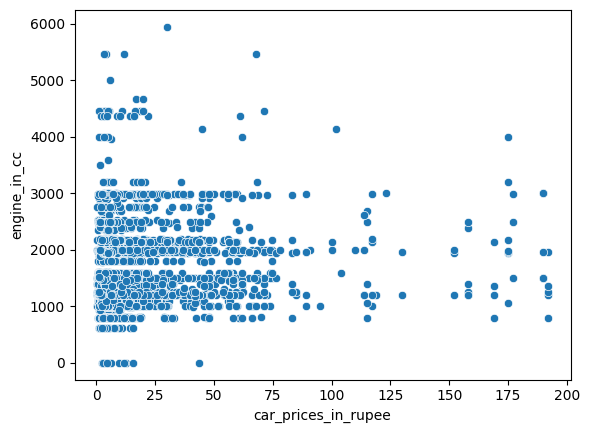

In [36]:
sns.scatterplot(x=cars['car_prices_in_rupee'],y=cars['engine_in_cc'])

In [37]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [38]:
k_bin_engine=KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy='quantile')
k_bin_km=KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy='quantile')



In [39]:
cars['engine_in_cc'].value_counts()

engine_in_cc
1197.0    714
1248.0    395
998.0     346
1498.0    252
1497.0    245
         ... 
1173.0      1
2359.0      1
5950.0      1
3956.0      1
2979.0      1
Name: count, Length: 139, dtype: int64

<Axes: xlabel='engine_in_cc', ylabel='Count'>

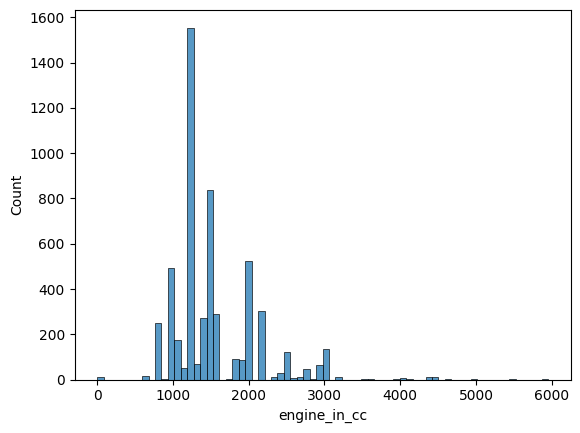

In [40]:
sns.histplot(cars['engine_in_cc'])

<Axes: xlabel='kms_driven', ylabel='Count'>

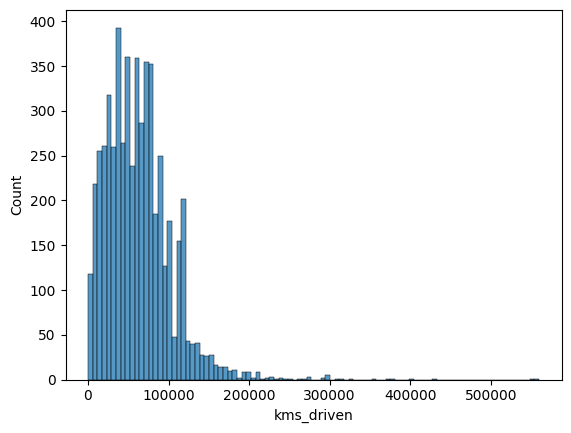

In [41]:
sns.histplot(cars['kms_driven'])

In [42]:
trf = ColumnTransformer(
    transformers=[('kms_driven_binning', k_bin_km, ['kms_driven'])],
    remainder='passthrough'  # This includes the other columns in the output
)

In [43]:
trf = ColumnTransformer(
    transformers = [('kms_driven_binning', k_bin_km, ['kms_driven'])],
    remainder = 'passthrough'
)

In [44]:
cars.head(1)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_in_cc,Seats,brand_name,model_name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1st Owner,2017,1956.0,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV


In [45]:
cars_new = trf.fit_transform(cars)

In [46]:
cars_new

array([[7.0, 0, 'Jeep Compass 2.0 Longitude Option BSIV', ..., '5 Seats',
        'Jeep', 'Compass 2.0 Longitude Option BSIV'],
       [0.0, 1, 'Renault Duster RXZ Turbo CVT', ..., '5 Seats',
        'Renault', 'Duster RXZ Turbo CVT'],
       [5.0, 2, 'Toyota Camry 2.5 G', ..., '5 Seats', 'Toyota',
        'Camry 2.5 G'],
       ...,
       [7.0, 5509, 'Jaguar XF 2.2 Litre Luxury', ..., '5 Seats',
        'Jaguar', 'XF 2.2 Litre Luxury'],
       [6.0, 5510, 'BMW 7 Series 730Ld', ..., '6 Seats', 'BMW',
        '7 Series 730Ld'],
       [3.0, 5511, 'BMW 5 Series 520d M Sport', ..., '5 Seats', 'BMW',
        '5 Series 520d M Sport']], dtype=object)

In [47]:
trf.named_transformers_['kms_driven_binning'].bin_edges_[0]

array([2.500000e+02, 1.700000e+04, 2.773900e+04, 3.900000e+04,
       4.900000e+04, 5.900000e+04, 6.900000e+04, 8.000000e+04,
       9.000400e+04, 1.144752e+05, 5.600000e+05])

In [48]:
cars['kms_bins'] = pd.cut(x=cars['kms_driven'],bins=trf.named_transformers_['kms_driven_binning'].bin_edges_[0].tolist())


In [49]:
cars['manufacture'].describe()

count    5512.000000
mean     2015.455552
std         3.927974
min      1995.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2022.000000
Name: manufacture, dtype: float64

In [50]:
cars.sort_values(by='manufacture', ascending=False)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_in_cc,Seats,brand_name,model_name,kms_bins
2756,2756,MG Hector Plus Sharp CVT,19.89,1923.0,Petrol,Automatic,1st Owner,2022,4663.0,5 Seats,MG,Hector Plus Sharp CVT,"(250.0, 17000.0]"
1575,1575,Mercedes-Benz C-Class C 220d,62.00,4000.0,Diesel,Automatic,1st Owner,2022,1461.0,5 Seats,Mercedes-Benz,C-Class C 220d,"(250.0, 17000.0]"
298,298,Tata Harrier XZ Plus Dark Edition,21.99,2443.0,Diesel,Manual,1st Owner,2022,1956.0,5 Seats,Tata,Harrier XZ Plus Dark Edition,"(250.0, 17000.0]"
5173,5173,MG Astor Style,9.77,4783.0,Petrol,Manual,1st Owner,2022,1995.0,7 Seats,MG,Astor Style,"(250.0, 17000.0]"
1520,1520,MG Astor Sharp CVT,17.25,2400.0,Petrol,Automatic,1st Owner,2022,1796.0,5 Seats,MG,Astor Sharp CVT,"(250.0, 17000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2204,Maruti 800 DX 5 Speed,0.40,80000.0,Petrol,Manual,1st Owner,2000,998.0,5 Seats,Maruti,800 DX 5 Speed,"(69000.0, 80000.0]"
3336,3336,Maruti 800 Std,0.35,80000.0,Petrol,Manual,2nd Owner,1999,1997.0,5 Seats,Maruti,800 Std,"(69000.0, 80000.0]"
2353,2353,Maruti Zen LX,0.60,100000.0,Petrol,Manual,2nd Owner,1998,1591.0,5 Seats,Maruti,Zen LX,"(90004.0, 114475.2]"
367,367,Maruti Zen VXI,1.10,90000.0,Petrol,Manual,3rd Owner,1998,993.0,5 Seats,Maruti,Zen VXI,"(80000.0, 90004.0]"


In [58]:
cars.drop(columns=['Unnamed: 0','model_name','kms_driven'])

,car_name,car_prices_in_rupee,fuel_type,transmission,ownership,manufacture,engine_in_cc,Seats,brand_name,kms_bins
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,Diesel,Manual,1st Owner,2017,1956.0,5 Seats,Jeep,"(80000.0, 90004.0]"
1,Renault Duster RXZ Turbo CVT,12.83,Petrol,Automatic,1st Owner,2021,1330.0,5 Seats,Renault,"(250.0, 17000.0]"
2,Toyota Camry 2.5 G,16.40,Petrol,Automatic,1st Owner,2016,2494.0,5 Seats,Toyota,"(59000.0, 69000.0]"
3,Honda Jazz VX CVT,7.77,Petrol,Automatic,1st Owner,2018,1199.0,5 Seats,Honda,"(17000.0, 27739.0]"
4,Volkswagen Polo 1.2 MPI Highline,5.15,Petrol,Manual,1st Owner,2016,1199.0,5 Seats,Volkswagen,"(69000.0, 80000.0]"
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90,Diesel,Automatic,1st Owner,2018,2995.0,7 Seats,BMW,"(39000.0, 49000.0]"
5508,BMW M Series M4 Coupe,64.90,Petrol,Automatic,2nd Owner,2015,1968.0,5 Seats,BMW,"(27739.0, 39000.0]"
5509,Jaguar XF 2.2 Litre Luxury,13.75,Diesel,Automatic,2nd Owner,2013,2755.0,5 Seats,Jaguar,"(80000.0, 90004.0]"
5510,BMW 7 Series 730Ld,29.90,Diesel,Automatic,3rd Owner,2015,2967.0,6 Seats,BMW,"(69000.0, 80000.0]"


In [52]:
cars['transmission'].value_counts()

transmission
Manual       3962
Automatic    1550
Name: count, dtype: int64

In [53]:
cars['fuel_type'].value_counts()

fuel_type
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: count, dtype: int64

In [ ]:
5 Seats    4673
7 Seats     631
4 Seats      88
6 Seats      61
8 Seats      54
2 Seats       5

In [55]:
cars['ownership'].value_counts()

ownership
1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: count, dtype: int64

In [71]:
cars['name']  = cars['car_name'].str.split().str.slice(0,3).str.join(" ")

In [76]:
cars.rename(columns={"manufacture": 'manufacturing_year'}, inplace= True)

In [84]:
cars.rename(columns={"car_prices_in_rupee": 'price_in_lakhs'}, inplace= True)

In [87]:
cars.rename(columns={"Seats": 'no_of_seats'}, inplace= True)

In [88]:
cars.head(1)

,Unnamed: 0,car_name,price_in_lakhs,kms_driven,fuel_type,transmission,ownership,manufacturing_year,engine_in_cc,no_of_seats,brand_name,model_name,kms_bins,name
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1st Owner,2017,1956.0,5 Seats,Jeep,Compass 2.0 Longitude Option BSIV,"(80000.0, 90004.0]",Jeep Compass 2.0


In [92]:
cars['no_of_seats'] = cars['no_of_seats'].str.replace(" Seats", "").astype(int)

In [97]:
clean_cars= cars[['brand_name','name','manufacturing_year','transmission','engine_in_cc','fuel_type','ownership','kms_driven', 'no_of_seats', 'price_in_lakhs' ]]

In [102]:
clean_cars.reset_index(drop=True)

,brand_name,name,manufacturing_year,transmission,engine_in_cc,fuel_type,ownership,kms_driven,no_of_seats,price_in_lakhs
0,Jeep,Jeep Compass 2.0,2017,Manual,1956.0,Diesel,1st Owner,86226.0,5,10.03
1,Renault,Renault Duster RXZ,2021,Automatic,1330.0,Petrol,1st Owner,13248.0,5,12.83
2,Toyota,Toyota Camry 2.5,2016,Automatic,2494.0,Petrol,1st Owner,60343.0,5,16.40
3,Honda,Honda Jazz VX,2018,Automatic,1199.0,Petrol,1st Owner,26696.0,5,7.77
4,Volkswagen,Volkswagen Polo 1.2,2016,Manual,1199.0,Petrol,1st Owner,69414.0,5,5.15
...,...,...,...,...,...,...,...,...,...,...
5507,BMW,BMW X1 sDrive,2018,Automatic,2995.0,Diesel,1st Owner,45000.0,7,28.90
5508,BMW,BMW M Series,2015,Automatic,1968.0,Petrol,2nd Owner,29000.0,5,64.90
5509,Jaguar,Jaguar XF 2.2,2013,Automatic,2755.0,Diesel,2nd Owner,90000.0,5,13.75
5510,BMW,BMW 7 Series,2015,Automatic,2967.0,Diesel,3rd Owner,79000.0,6,29.90


In [104]:
clean_cars.to_csv("clean_cars.csv",index=False)

brand_name
Maruti           1389
Hyundai          1023
other_brands      524
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Name: count, dtype: int64